<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# The Normal Distribution and the Central Limit Theorem

---

## Learning Objectives

### Core
- Visualize the normal distribution
- Understand the uses of the 68-95-99.7 rule
- Visualize the 68-95-99.7 rule
- Apply z-scoring to data

### Target
- Apply the Central Limit Theorem
    - Create random samples from a data set
    - Visualize the CLT by plotting the distribution of means obtained from different samples

### Stretch
- Use a quantile-quantile plot to compare a given distribution to the standard normal distribution
- Understand the limitations of the central limit theorem

<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1">Learning Objectives</a></span><ul class="toc-item"><li><span><a href="#Core" data-toc-modified-id="Core-1.1">Core</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-1.2">Target</a></span></li><li><span><a href="#Stretch" data-toc-modified-id="Stretch-1.3">Stretch</a></span></li></ul></li><li><span><a href="#Sample-statistics-and-parameters" data-toc-modified-id="Sample-statistics-and-parameters-2">Sample statistics and parameters</a></span></li><li><span><a href="#The-Normal-distribution" data-toc-modified-id="The-Normal-distribution-3">The Normal distribution</a></span></li><li><span><a href="#The-68-95-99.7-Rule" data-toc-modified-id="The-68-95-99.7-Rule-4">The 68-95-99.7 Rule</a></span></li><li><span><a href="#The-z-score" data-toc-modified-id="The-z-score-5">The z-score</a></span></li><li><span><a href="#The-Central-Limit-Theorem" data-toc-modified-id="The-Central-Limit-Theorem-6">The Central Limit Theorem</a></span></li><li><span><a href="#Visualizing-the-CLT:-bikeshare-data" data-toc-modified-id="Visualizing-the-CLT:-bikeshare-data-7">Visualizing the CLT: bikeshare data</a></span><ul class="toc-item"><li><span><a href="#Load-in-the-data-and-extract-several-variables" data-toc-modified-id="Load-in-the-data-and-extract-several-variables-7.1">Load in the data and extract several variables</a></span></li><li><span><a href="#Create-a-function-for-plotting-the-distribution-of-a-variable" data-toc-modified-id="Create-a-function-for-plotting-the-distribution-of-a-variable-7.2">Create a function for plotting the distribution of a variable</a></span></li><li><span><a href="#Write-a-function-that-will-take-a-random-sample-of-given-size-$n$-of-any-of-the-variables-above-a-1000-times,-calculate-the-means-of-the-samples,-and-return-the-sample-means-as-a-new-list." data-toc-modified-id="Write-a-function-that-will-take-a-random-sample-of-given-size-$n$-of-any-of-the-variables-above-a-1000-times,-calculate-the-means-of-the-samples,-and-return-the-sample-means-as-a-new-list.-7.3">Write a function that will take a random sample of given size $n$ of any of the variables above a 1000 times, calculate the means of the samples, and return the sample means as a new list.</a></span></li><li><span><a href="#Plot-the-sample-means-using-the-distribution-plotter-function." data-toc-modified-id="Plot-the-sample-means-using-the-distribution-plotter-function.-7.4">Plot the sample means using the distribution plotter function.</a></span></li></ul></li><li><span><a href="#Independent-practice" data-toc-modified-id="Independent-practice-8">Independent practice</a></span><ul class="toc-item"><li><span><a href="#Use-other-variables-from-the-dataset-to-test-the-central-limit-theorem.-Vary-$n$-and-$k$-until-you-get-a-sufficiently-normal-distribution-of-the-sample-means." data-toc-modified-id="Use-other-variables-from-the-dataset-to-test-the-central-limit-theorem.-Vary-$n$-and-$k$-until-you-get-a-sufficiently-normal-distribution-of-the-sample-means.-8.1">Use other variables from the dataset to test the central limit theorem. Vary $n$ and $k$ until you get a sufficiently normal distribution of the sample means.</a></span></li></ul></li><li><span><a href="#Additional-resources" data-toc-modified-id="Additional-resources-9">Additional resources</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import scipy.stats as stats

## Sample statistics and parameters

---

Recall that we use sample statistics to estimate population parameters. Our goal is to calculate sample statistics and then rely on properties of a random sample (and perhaps additional assumptions) to make inferences that we can generalize to the larger population of interest.

Below is a table comparing some example sample statistics and population parameters:

Metric  | Statistic         | Parameter 
-------- | ------------------ | ------------------ 
mean   | $$\bar{x} = \frac{\sum x}{n}$$ | $$ \mu = \frac{\sum x}{N} $$      
standard deviation   | $$ s = \sqrt{\frac{\sum_i (x_i - \bar{x})^2}{n-1}} $$ | $$ \sigma = \sqrt{\frac{\sum_i (x_i - \mu)^2}{N} } $$
correlation   | $$ r = \frac{\hat{Cov}(X, Y)}{s_X s_Y} $$ | $$ \rho = \frac{Cov(X, Y)}{\sigma_X \sigma_Y} $$

## The Normal distribution

---

The normal distribution is arguably the most commonly used distribution in all of statistics. **Normality** is an assumption that underlies many statistical tests and serves as a convenient model for the distribution of many (but not all!) variables.

The normal distribution relies on two parameters: 
- The population mean
- The population standard deviation. 

If a variable follows a Normal distribution exactly, its mean, median, and mode will all be equal.

**Example: Intelligence Quotient**

Intelligence Quotient (IQ) follows a Normal distribution by design. IQ is Normally distributed with a mean of 100 and a standard deviation of 15. You might see this specified like:
- IQ ~ Normal(100,15) 
- or IQ ~ N(100,15)

**We can plot the Normal distribution N(100, 15) using `scipy`.**

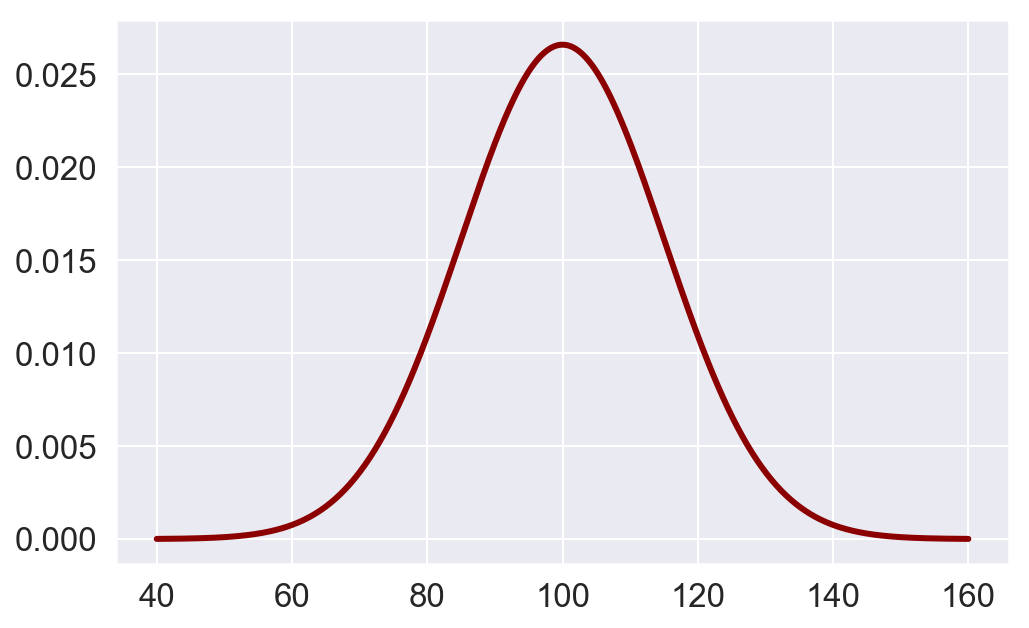

In [3]:
# Generate points on the x axis:
xpoints = np.linspace(40, 160, 500)

# Use stats.norm.pdf to get values on the probability density function for the Normal distribution
ypoints = stats.norm.pdf(xpoints, 100, 15)

# initialize a matplotlib "figure":
fig, ax = plt.subplots(figsize=(8,5))

# Plot the lines using matplotlib's plot function:
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')
plt.show()

## The 68-95-99.7 Rule

---

It is often beneficial to identify how extreme (or far away from the expected value) a particular observation is within the context of a distribution. 

For example, an extreme stock price might indicate a major shift in the market. This might inform whether we choose to buy or sell. Or, an extreme drop in air pressure might indicate a significant weather event, necessitating a reaction from the National Weather Service. Quantifying just how extreme a particular observation is from the expected value (a.k.a., population mean) may indicate a particular action we should take.

It is possible to show that, for a Normal distribution:
- 68% of observations from a population will fall within $\pm 1$ standard deviation of the population mean.
- 95% of observations from a population will fall within $\pm 2$ standard deviations of the population mean.
- 99.7% of observations from a population will fall within $\pm 3$ standard deviations of the population mean.

**Check:** What percentage of individuals have an IQ between 85 and 115?

**Check:** What percentage of individuals have an IQ above 100?

**Check:** What percentage of individuals have an IQ between 85 and 130?

**Below is a visual representation of the 68-95-99.7 rule on the IQ distribution:**

(100.1140995550784, 14.970425310450374)


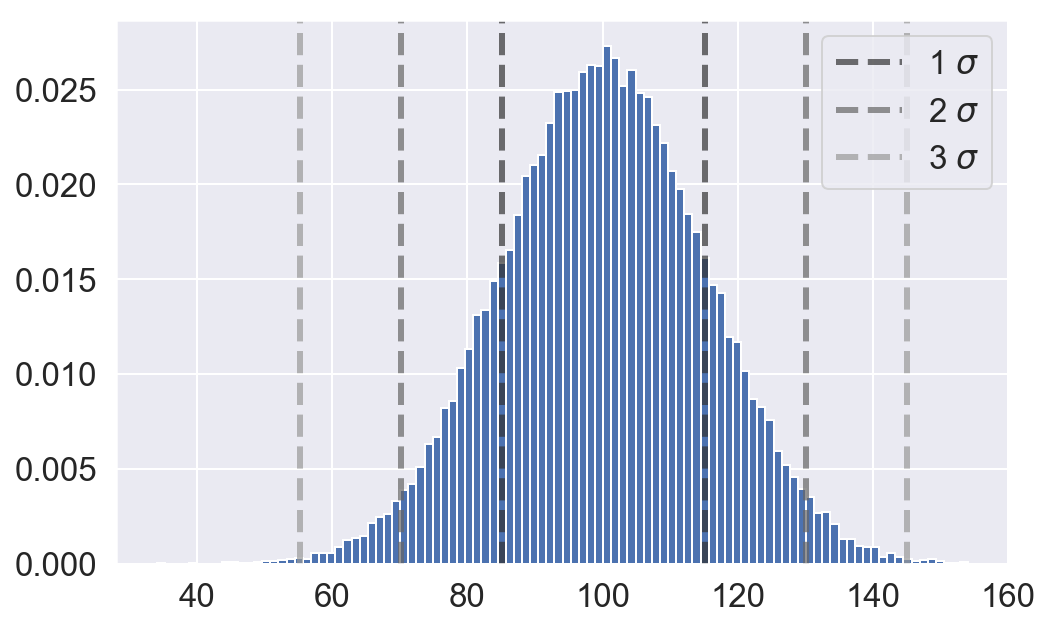

In [6]:
#Set mean and standard deviation
mu, sigma = 100, 15

#Here is a set of points
xpoints = np.random.normal(mu, sigma, 50000)

avg = np.mean(xpoints)
std = np.std(xpoints)

#check your values
print((avg,std))

#Define variables for 1,2,3 sigma
std1 = avg + std
std1_neg = avg - std
std2 = avg + 2*std
std2_neg = avg - 2*std
std3 = avg + 3*std
std3_neg = avg - 3*std

#Start Figure
#---------------------------------------
# Initialize a matplotlib "figure"
fig, ax = plt.subplots(figsize=(8,5))

# 68%:
ax.axvline(std1_neg, ls='dashed', lw=3, color='#333333', alpha=0.7, label='1 $\sigma$')
ax.axvline(std1, ls='dashed', lw=3, color='#333333', alpha=0.7)

# 95%
ax.axvline(std2_neg, ls='dashed', lw=3, color='#666666', alpha=0.7, label='2 $\sigma$')
ax.axvline(std2, ls='dashed', lw=3, color='#666666', alpha=0.7)

# 99.7%
ax.axvline(std3, ls='dashed', lw=3, color='#999999', alpha=0.7,label='3 $\sigma$')
ax.axvline(std3_neg, ls='dashed', lw=3, color='#999999', alpha=0.7)

# plot the lines using matplotlib's hist function:
ax.hist(xpoints,density=True, bins=100)
ax.legend()
plt.show()

## The z-score
---

While it's nice to have this 68-95-99.7 rule, we can get more specific. 

**The z-score of an observation quantifies how many standard deviations the observation is away from the population mean:**

$$ z_i = \frac{x_i - \text{population mean of x}}{\text{standard deviation of x}} $$

If we have $X \sim N(\mu, \sigma)$, with the random variable $X$ specified by a normal distribution with mean $\mu$ and standard deviation $\sigma$, we can specify the z-distribution as  $Z \sim N(0,1)$. 

We call $Z$ the **standard normal distribution** because it has a mean of 0 and standard deviation of 1.

The `scipy.stats.zscore` function will convert a vector of values to their respective z-scores.

**Calculate the z-scores for a simple vector of values:**

In [10]:
import numpy as np
values = np.array([2,3,4,5,6])

stats.zscore(values)
#import inspect
#inspect.getsourcelines(stats.zscore)

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

**Check:** Describe how the `scipy.stats.zscore` function converts the vector of values.

**Check:** If $X$ is not normal, but we calculate $Z$ by standardizing $X$ using the mean and standard deviation of $X$ as above, is Z ~ N(0,1)?

## The Central Limit Theorem


---

Normality underlies many of the inferential techniques that we will use in this course. That the normal distribution is of such importance is related to the central limit theorem.

Consider the random variable $X$. We can take a sample from this population of size $n$ and find the mean of that sample. Let's call this sample mean $x_1$. We can take another sample from this population, also of size $n$, and find the mean of that sample. Let's call this sample mean $x_2$. We can do this over and over until we've calculated the mean of every possible sample of size $n$. If we plotted every sample mean on a histogram, we would get another distribution called "the sampling distribution of $\bar{X}$."

**This distribution, the sampling distribution of $\bar{X}$, is  normally distributed even if the distribution of $X$ is not.** (That is, unless some necessary conditions are violated).

We can formally define [the central limit theorm](http://homepages.math.uic.edu/~bpower6/stat101/Sampling%20Distributions.pdf) in the following way:

> In probability theory, the central limit theorem (CLT) states that, when independent random variables are added, their sum tends toward a normal distribution (commonly known as a bell curve), even if the original variables themselves are not normally distributed. In more precise terms, given certain conditions, the arithmetic mean of a sufficiently large number of iterates of independent random variables — each with a well-defined (finite) expected value and finite variance — will be approximately normally distributed, regardless of the underlying distribution.

Some properties that arise from the central limit theorem include:

> If $X \sim N(\mu,\sigma)$, then $\bar{X}$ is exactly $N(\mu,\frac{\sigma}{\sqrt{n}})$.

> If $X$ is not normally distributed, then $\bar{X}$ is approximately $N(\mu,\frac{\sigma}{\sqrt{n}})$ if the sample size $n$ is at least 30. As $n$ increases, $\bar{X}$ becomes asymptotically normally distributed.

> If $\bar{X}$ is normally distributed, then we can use inferential methods that rely on our sample mean, $\bar{x}$.

## Visualizing the CLT: bikeshare data

---

Below is the path to a `.csv` with a variety of data on bikesharing. Many of the variables measured in the data set are far from normally distributed. We will show that, despite this fact, the distribution of sample means for these variables will be asymptotically normally distributed, as proven by the CLT.

> **NOTE:** The code below uses the pandas package to load the data into a pandas DataFrame and extract the salary information. If this is unfamiliar, you can safely ignore this part of the code for now.

### Load in the data and extract several variables

In [11]:
import pandas as pd

data = pd.read_csv('../../../../resource-datasets/bikeshare/bikeshare.csv')
print(data.shape)

data.head()

FileNotFoundError: File b'../../../../resource-datasets/bikeshare/bikeshare.csv' does not exist

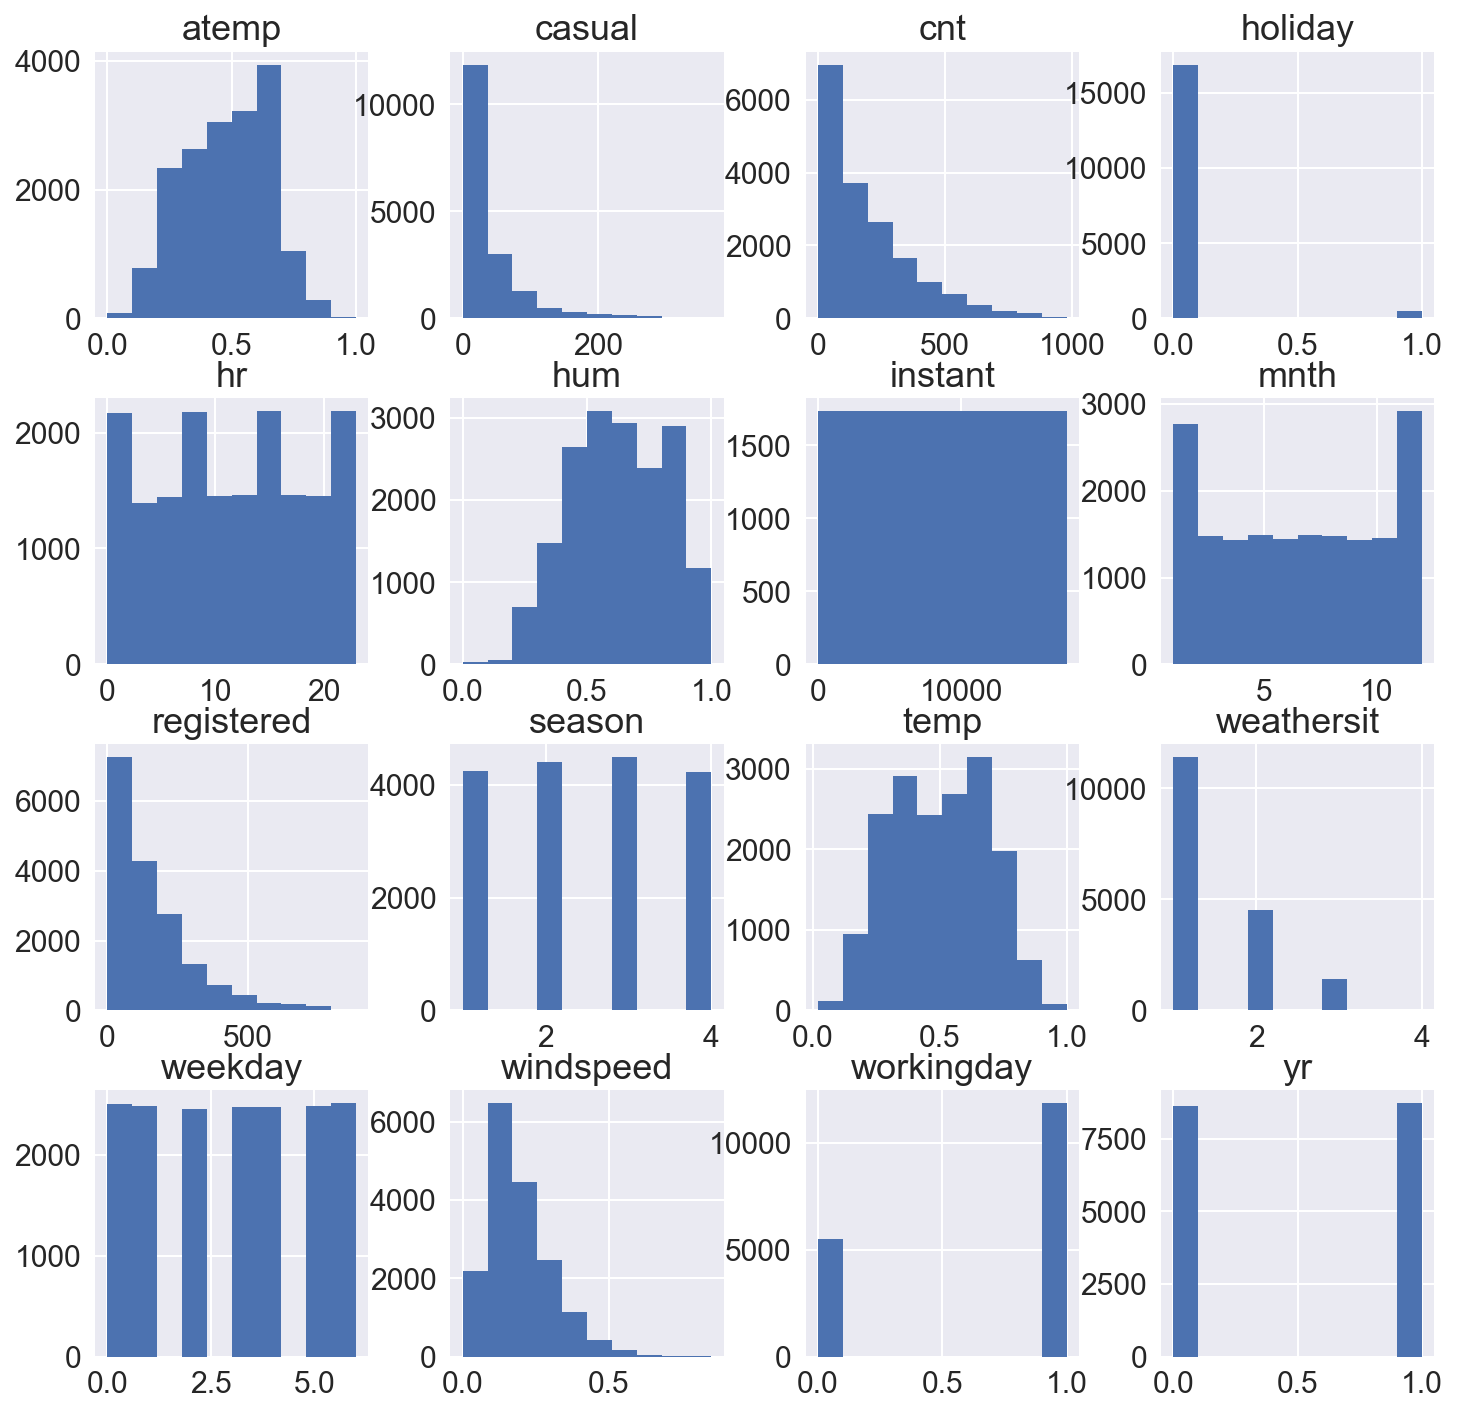

In [7]:
data.hist(figsize=(12,12));

### Create a function for plotting the distribution of a variable

Apply this function to several variables. Are these variables normally distributed?

In [8]:
def dist_plotter(sample,bins=50,kde=False):
    fig, ax = plt.subplots(figsize=(8,6))
    sns.distplot(sample, bins=bins, kde=kde)
    plt.show()

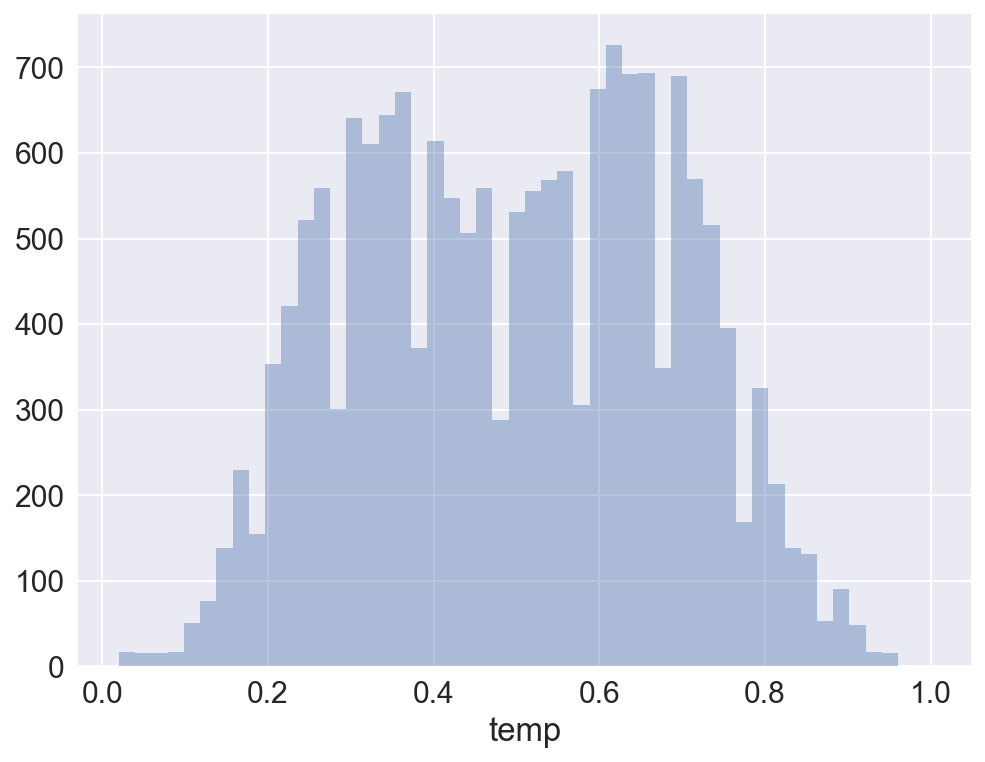

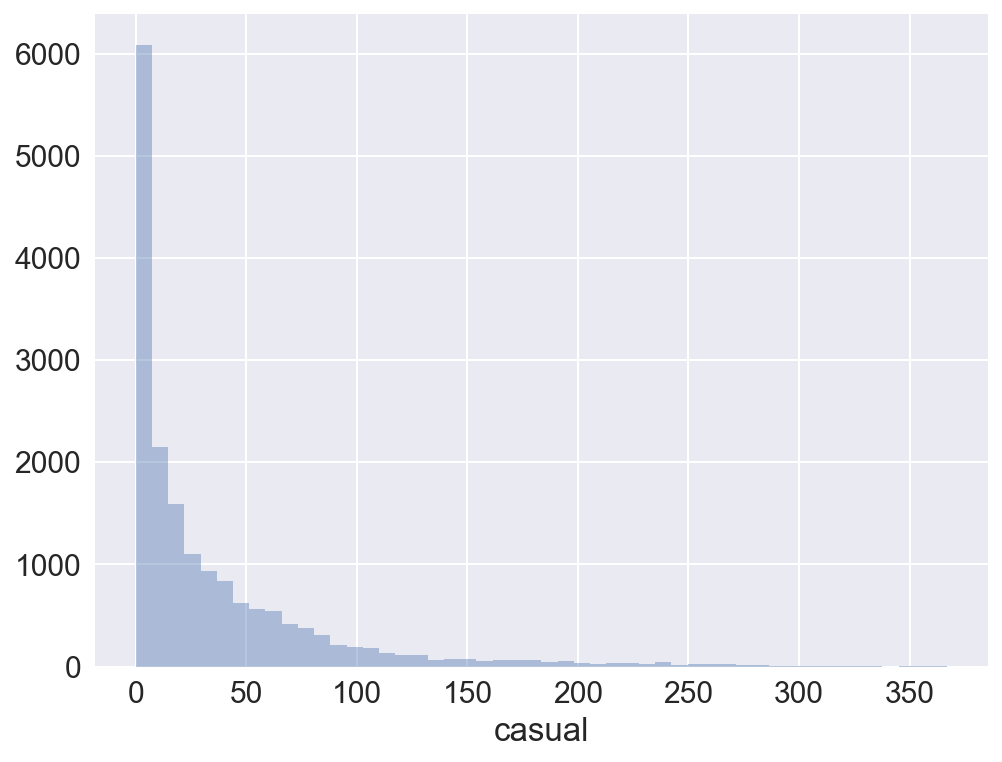

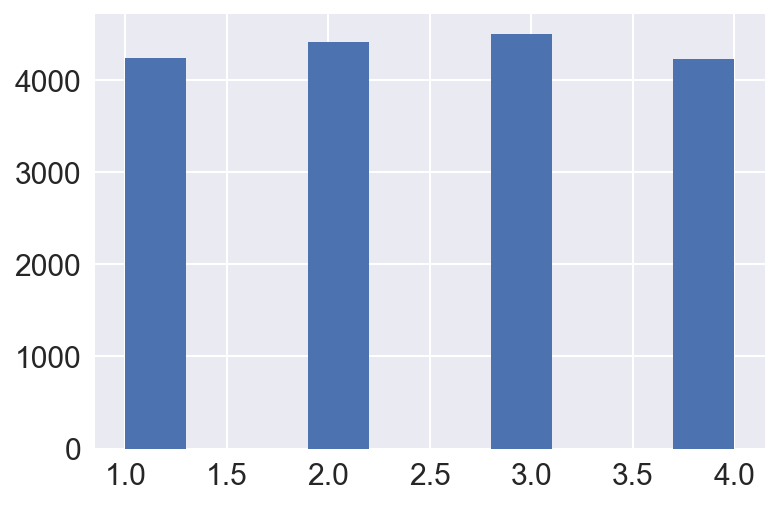

In [9]:
dist_plotter(data.temp)
dist_plotter(data.casual)
data.season.hist();

### Write a function that will take a random sample of given size $n$ of any of the variables above a 1000 times, calculate the means of the samples, and return the sample means as a new list.

*Hint: you can use `numpy`'s `np.random.choice` to perform your sampling.*

In [10]:
def sampler(population, n=30, k=1000):
    sample_means = []
    for i in range(k):
        sample = np.random.choice(population, size=n, replace=True)
        sample_means.append(np.mean(sample))
    return sample_means

### Plot the sample means using the distribution plotter function.
Is the distribution of sample means approximately normally distributed? What happens if you increase the number of sample means to 10,000? 100,000?

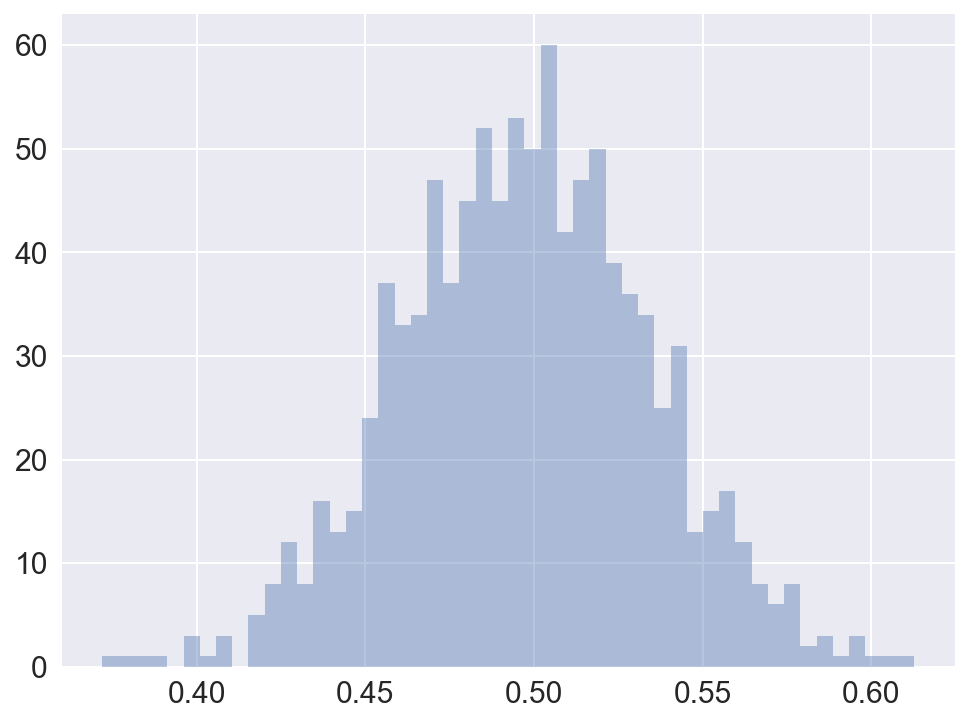

In [11]:
n = 30
k = 1000
means = sampler(data.temp,n=n,k=k)
dist_plotter(means)

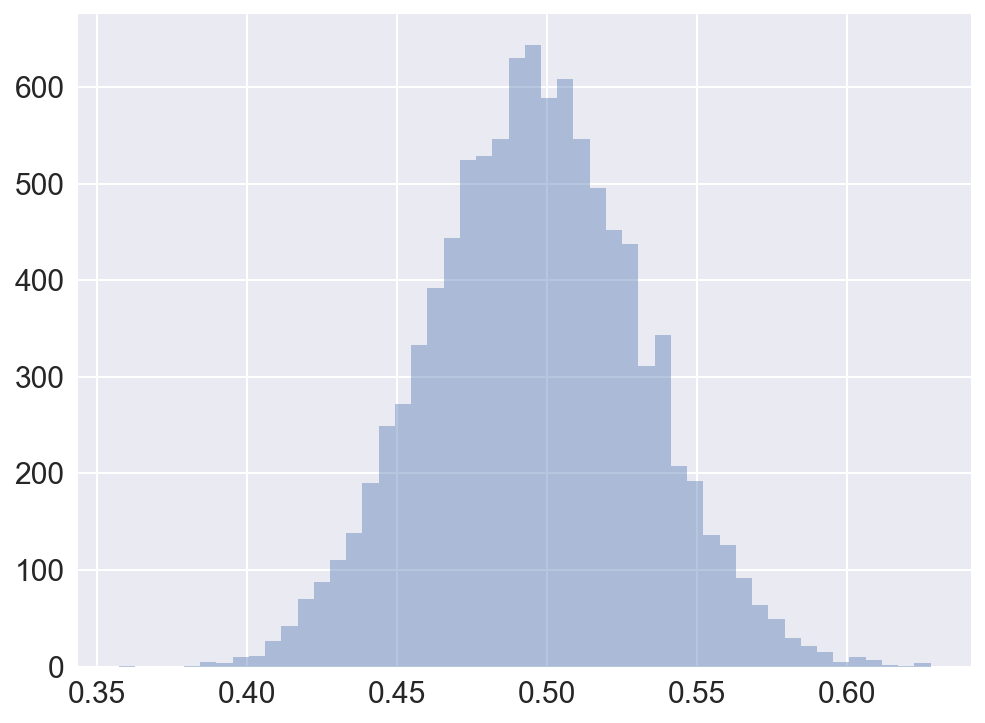

In [12]:
n = 30
k = 10000
means = sampler(data.temp,n=n,k=k)
dist_plotter(means)

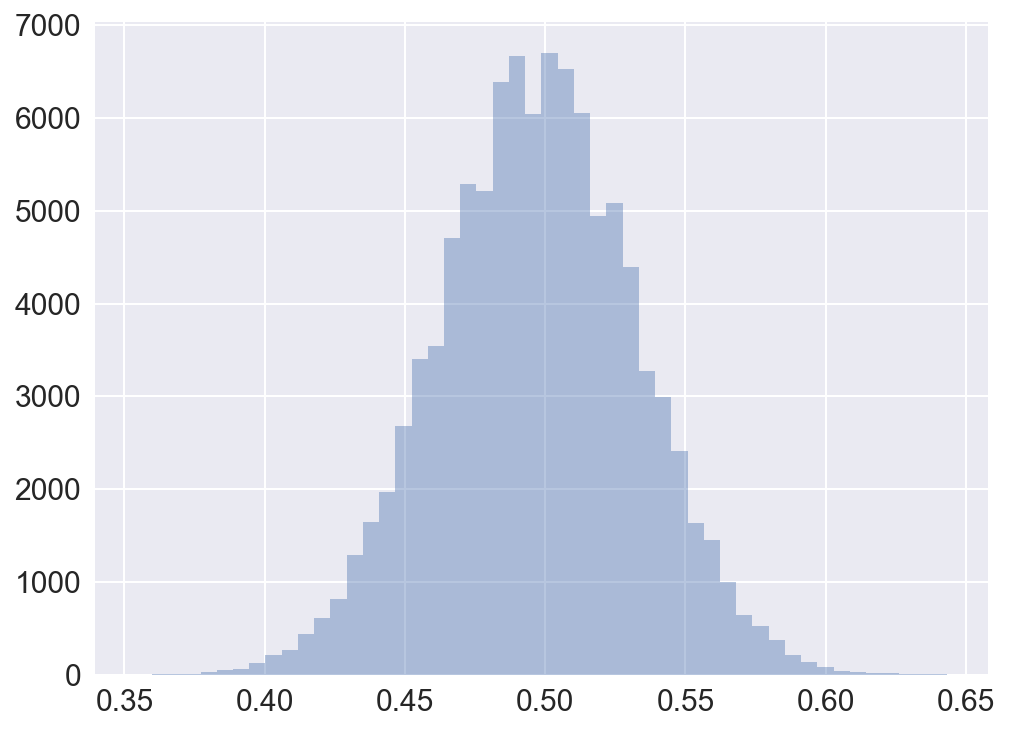

In [13]:
n = 30
k = 100000
means = sampler(data.temp,n=n,k=k)
dist_plotter(means)

That looks now reasonably like a normal distribution, but how good we got is difficult to judge by pure eye. For a better illustration we can use a **quantile-quantile plot**. It plots the quantile boundaries of a given (standardized) distribution versus the quantile boundaries of the standard normal distribution. If the given data were normally distributed, we would see a straight line passing through the origin with slope one.

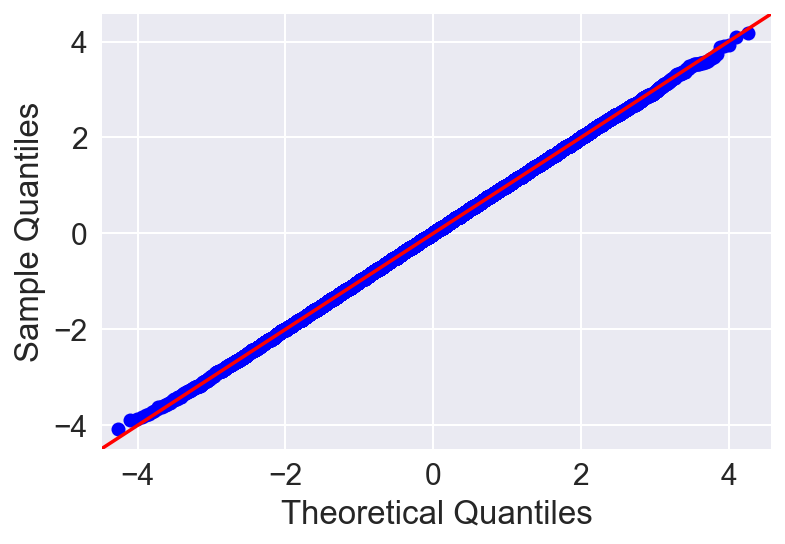

In [14]:
from statsmodels.graphics.gofplots import qqplot

qqplot(np.array(means),line='45',fit=True);

## Independent practice

---

### Use other variables from the dataset to test the central limit theorem. Vary $n$ and $k$ until you get a sufficiently normal distribution of the sample means.

Warning: The more skewed the distribution, the more you will have to increase both $n$ and $k$.

## Additional resources
---

http://blog.vctr.me/posts/central-limit-theorem.html

http://www.usablestats.com/lessons/central_limit

http://blog.minitab.com/blog/michelle-paret/explaining-the-central-limit-theorem-with-bunnies-and-dragons-v2
